In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
booking_data=pd.read_csv("hotel_bookings.csv")

In [4]:
booking_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [35]:
#1)Data inspection and cleaning

In [6]:
booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119389 non-null  float64
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
booking_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [9]:
fill_values = {
    'adults': booking_data['adults'].mean(),
    'children': booking_data['children'].median(),
    'country': booking_data['country'].mode()[0],
    'market_segment': booking_data['market_segment'].mode()[0],
    'distribution_channel': booking_data['distribution_channel'].mode()[0],
    'reserved_room_type': booking_data['reserved_room_type'].mode()[0],
    'assigned_room_type': booking_data['assigned_room_type'].mode()[0],
    'deposit_type': booking_data['deposit_type'].mode()[0],
    'agent': booking_data['agent'].mode()[0],
    'company': booking_data['company'].mode()[0],
    'customer_type': booking_data['customer_type'].mode()[0],
    'reservation_status': booking_data['reservation_status'].mode()[0]
}
booking_data = booking_data.fillna(fill_values)

In [10]:
booking_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
duplicateRows = booking_data[booking_data.duplicated()]

In [12]:
duplicateRows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,03/07/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2.0,...,No Deposit,250.0,40.0,0,Transient,84.67,0,1,Check-Out,07/07/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2.0,...,No Deposit,250.0,40.0,0,Transient,137.00,0,1,Check-Out,07/07/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2.0,...,No Deposit,240.0,40.0,0,Transient,97.00,0,0,Canceled,01/07/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1.0,...,No Deposit,240.0,40.0,0,Transient,109.80,0,3,Check-Out,08/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2.0,...,No Deposit,9.0,40.0,0,Transient,126.00,0,2,Check-Out,03/09/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,40.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,40.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,40.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017


In [13]:
booking_data.drop_duplicates(inplace=True)

In [14]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87380 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87380 non-null  object 
 1   is_canceled                     87380 non-null  int64  
 2   lead_time                       87380 non-null  int64  
 3   arrival_date_year               87380 non-null  int64  
 4   arrival_date_month              87380 non-null  object 
 5   arrival_date_week_number        87380 non-null  int64  
 6   arrival_date_day_of_month       87380 non-null  int64  
 7   stays_in_weekend_nights         87380 non-null  int64  
 8   stays_in_week_nights            87380 non-null  int64  
 9   adults                          87380 non-null  float64
 10  children                        87380 non-null  float64
 11  babies                          87380 non-null  int64  
 12  meal                            8738

In [15]:
booking_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,40.0,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [16]:
Q1 = booking_data['is_canceled'].quantile(0.25)
Q3 = booking_data['is_canceled'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = [(booking_data['is_canceled'] < (Q1 - 1.5 * IQR)) | (booking_data['is_canceled'] > (Q3 + 1.5 * IQR))]
outliers

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 119385    False
 119386    False
 119387    False
 119388    False
 119389    False
 Name: is_canceled, Length: 87380, dtype: bool]

In [17]:
n1=sum(outliers)
n1.sum()

0

In [18]:
Q1 = booking_data['agent'].quantile(0.25)
Q3 = booking_data['agent'].quantile(0.75)
IQR = Q3 - Q1

outliers = [(booking_data['agent'] < (Q1 - 1.5 * IQR)) | (booking_data['agent'] > (Q3 + 1.5 * IQR))]
outliers

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 119385    False
 119386    False
 119387    False
 119388    False
 119389    False
 Name: agent, Length: 87380, dtype: bool]

In [19]:
n1=sum(outliers)
n1.sum()

0

In [20]:
Q1 = booking_data['adr'].quantile(0.25)
Q3 = booking_data['adr'].quantile(0.75)
IQR = Q3 - Q1


outliers = [(booking_data['adr'] < (Q1 - 1.5 * IQR)) | (booking_data['adr'] > (Q3 + 1.5 * IQR))]
n1=sum(outliers)
n1.sum()

2488

In [21]:
booking_data['lead_time'] = np.log1p(booking_data['lead_time'].abs())

In [22]:
Q1 = booking_data['lead_time'].quantile(0.25)
Q3 = booking_data['lead_time'].quantile(0.75)
IQR = Q3 - Q1


outliers = [(booking_data['lead_time'] < (Q1 - 1.5 * IQR)) | (booking_data['lead_time'] > (Q3 + 1.5 * IQR))]
n1=sum(outliers)
n1.sum()

0

In [7]:
import seaborn as sns


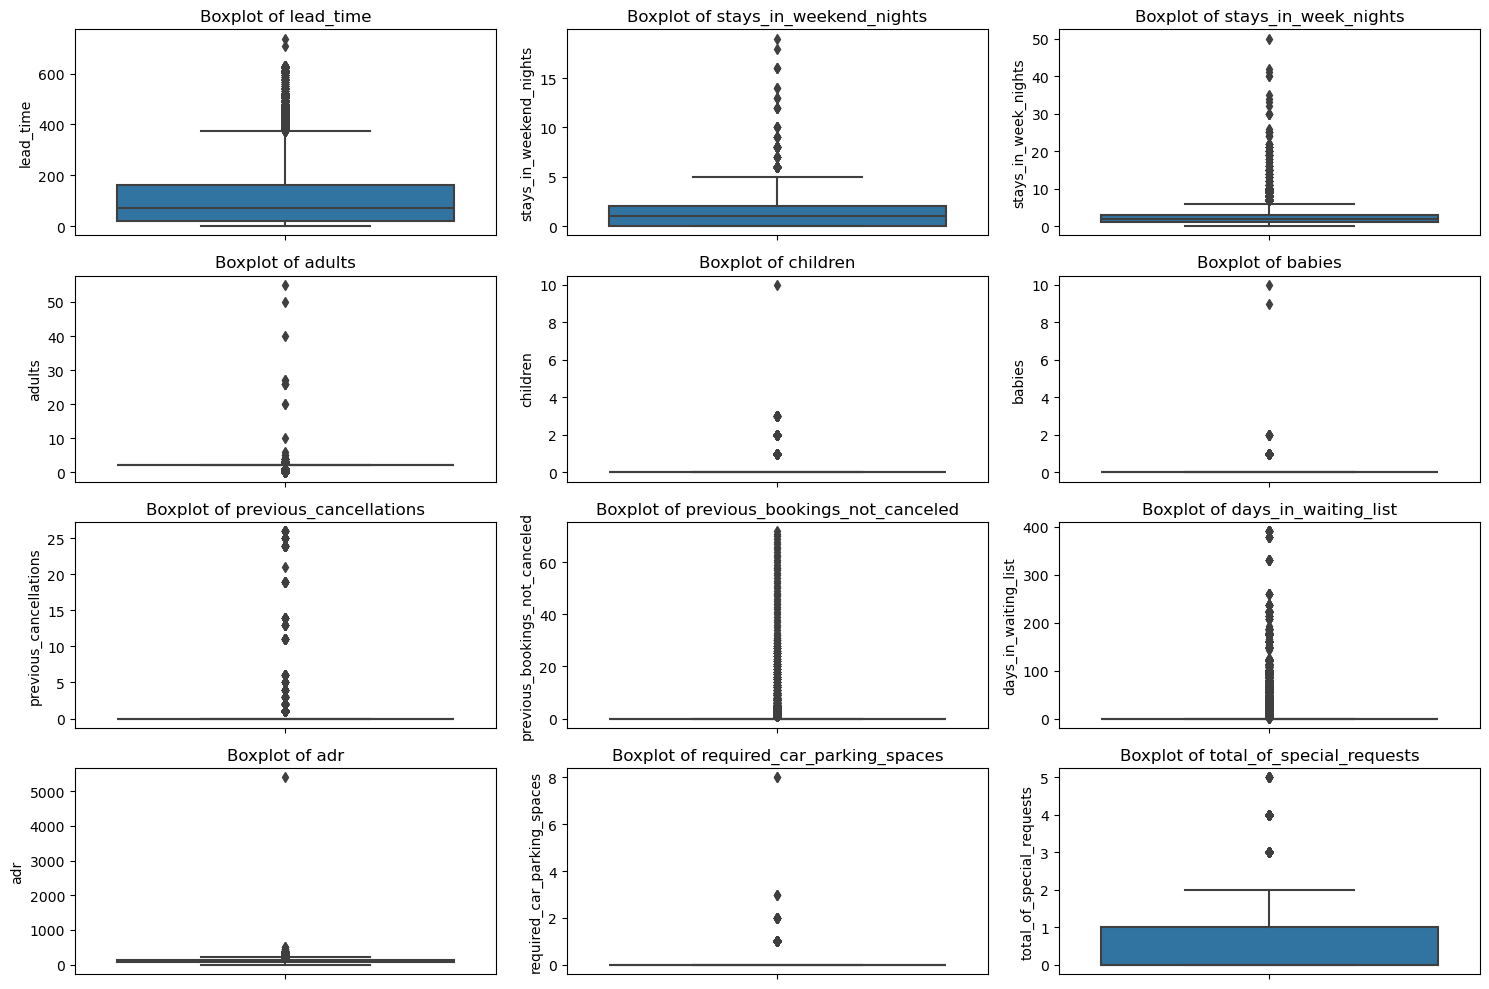

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = [ 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

#Outliers visualization
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=booking_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

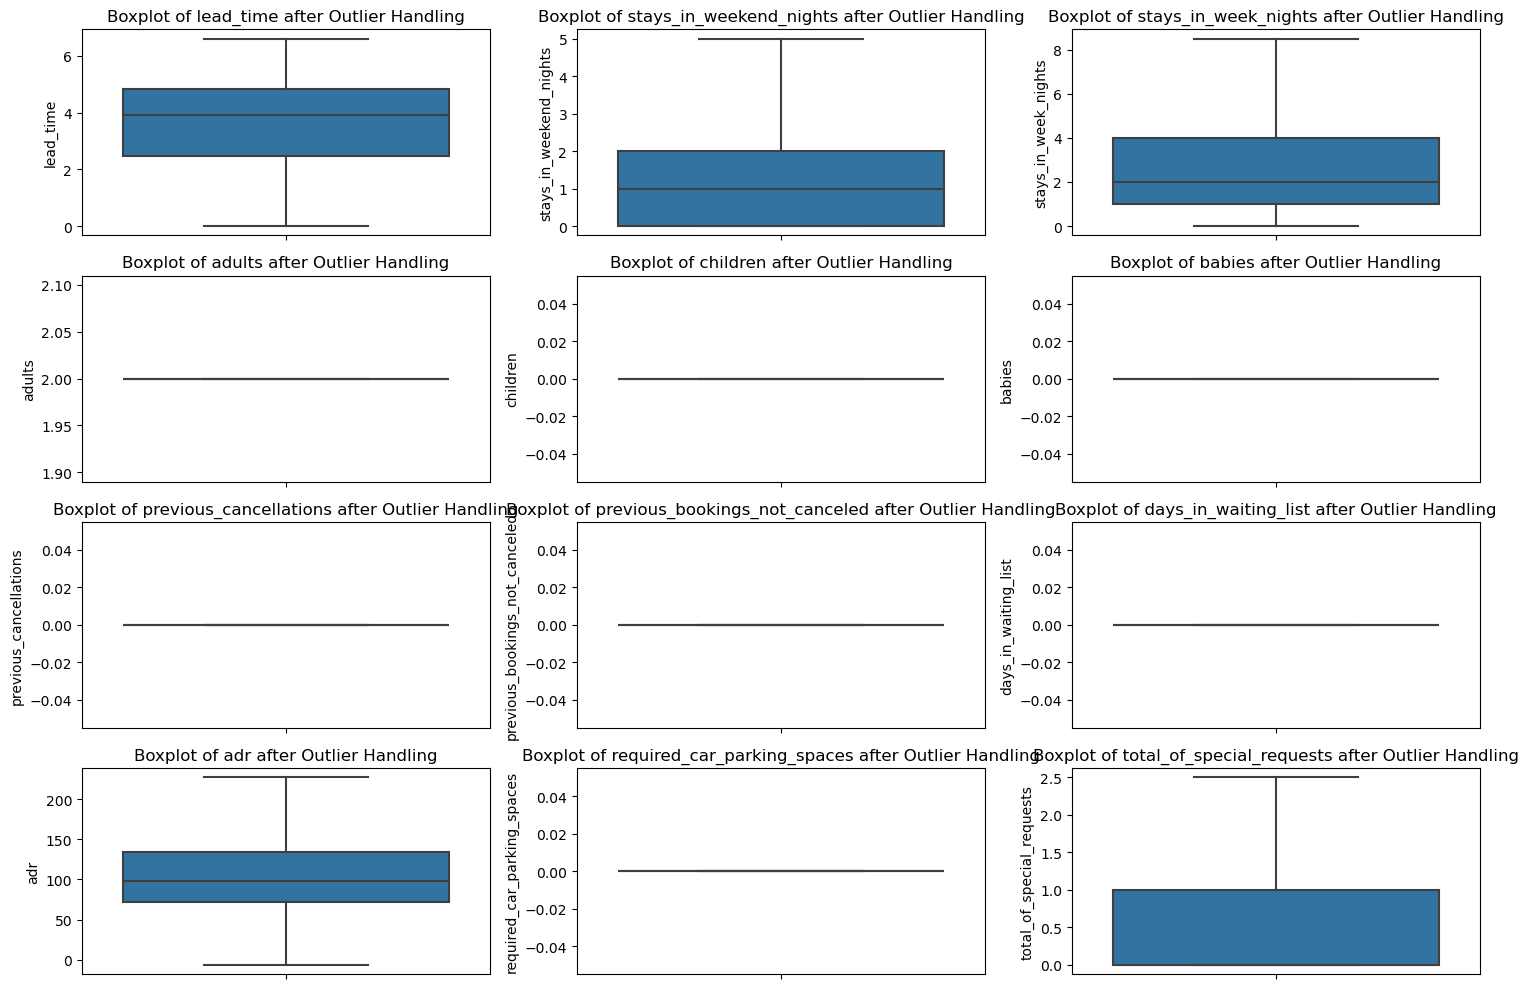

In [28]:
#detect and handle outliers using IQR method
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Handling outliers by capping them to the lower and upper bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Apply the function to handle outliers in numerical columns
booking_data_cleaned = handle_outliers(booking_data.copy(), numerical_columns)

# Verify by plotting the box plots again
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=booking_data_cleaned[column])
    plt.title(f'Boxplot of {column} after Outlier Handling')
plt.tight_layout()
plt.show() 

In [31]:
# Checking for invalid values in numerical columns
invalid_values = {}

# Adults, children, babies should be non-negative
invalid_values['adults'] = booking_data[booking_data['adults'] < 0]
invalid_values['children'] = booking_data[booking_data['children'] < 0]
invalid_values['babies'] = booking_data[booking_data['babies'] < 0]

# Stays in weekend nights and stays in week nights should be non-negative
invalid_values['stays_in_weekend_nights'] = booking_data[booking_data['stays_in_weekend_nights'] < 0]
invalid_values['stays_in_week_nights'] = booking_data[booking_data['stays_in_week_nights'] < 0]

# Print any found invalid values
for key, value in invalid_values.items():
    if not value.empty:
        print(f"Invalid values in {key}:\n", value)

In [34]:
# Checking for typos or inconsistencies in categorical columns
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

value_counts = {}
for column in categorical_columns:
    value_counts[column] = booking_data[column].value_counts()

value_counts
def check_categorical_inconsistencies(df, column):
    return df[column].value_counts()

categorical_inconsistencies = {}
for column in categorical_columns:
    categorical_inconsistencies[column] = check_categorical_inconsistencies(booking_data, column)

# Print unique values for each categorical column to check for inconsistencies
for key, value in categorical_inconsistencies.items():
    print(f"Unique values in {key}:\n", value)

Unique values in hotel:
 hotel
City Hotel      53431
Resort Hotel    33949
Name: count, dtype: int64
Unique values in country:
 country
PRT    27890
GBR    10433
FRA     8837
ESP     7251
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64
Unique values in market_segment:
 market_segment
Online TA        51617
Offline TA/TO    13885
Direct           11798
Groups            4943
Corporate         4206
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64
Unique values in distribution_channel:
 distribution_channel
TA/TO        69139
Direct       12980
Corporate     5075
GDS            181
Undefined        5
Name: count, dtype: int64
Unique values in is_repeated_guest:
 is_repeated_guest
0    83965
1     3415
Name: count, dtype: int64
Unique values in reserved_room_type:
 reserved_room_type
A    56540
D    17396
E     6048
F     2822
G     2052
B      999
C      915
H   

In [36]:
# Ensure that 'adults', 'children', and 'babies' are not all zero (anomalous bookings)
anomalous_bookings = booking_data[(booking_data['adults'] == 0) & (booking_data['children'] == 0) & (booking_data['babies'] == 0)]
print("Anomalous bookings where adults, children, and babies are all zero:\n", anomalous_bookings)

Anomalous bookings where adults, children, and babies are all zero:
                hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0   0.693147               2015   
2409    Resort Hotel            0   0.000000               2015   
3181    Resort Hotel            0   3.610918               2015   
3684    Resort Hotel            0   5.111988               2015   
3708    Resort Hotel            0   5.111988               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0   4.682131               2017   
115091    City Hotel            0   0.693147               2017   
116251    City Hotel            0   3.806662               2017   
116534    City Hotel            0   1.098612               2017   
117087    City Hotel            0   5.141664               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409            

In [38]:
#2)Descriptive Statistics

In [39]:
booking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000,87380.000000
mean,0.274983,3.529432,2016.210254,26.840970,15.815427,1.005344,2.625612,1.875908,0.138659,0.010826,0.039082,0.030419,0.184024,0.271641,82.260002,48.603388,0.754177,106.343954,0.084241,0.698569
std,0.446508,1.629423,0.686108,13.673578,8.834661,1.031965,2.053653,0.626473,0.455909,0.113607,0.193792,0.369179,1.732050,0.727299,109.055390,46.703668,10.103268,55.004531,0.281557,0.831930
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,2.484907,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,3.912023,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,4.836282,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,40.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,6.603944,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [40]:
# Display value counts for categorical columns
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

value_counts = {}
for column in categorical_columns:
    value_counts[column] = booking_data[column].value_counts()

value_counts

{'hotel': hotel
 City Hotel      53431
 Resort Hotel    33949
 Name: count, dtype: int64,
 'country': country
 PRT    27890
 GBR    10433
 FRA     8837
 ESP     7251
 DEU     5387
        ...  
 MMR        1
 BFA        1
 CYM        1
 MLI        1
 KHM        1
 Name: count, Length: 177, dtype: int64,
 'market_segment': market_segment
 Online TA        51617
 Offline TA/TO    13885
 Direct           11798
 Groups            4943
 Corporate         4206
 Complementary      702
 Aviation           227
 Undefined            2
 Name: count, dtype: int64,
 'distribution_channel': distribution_channel
 TA/TO        69139
 Direct       12980
 Corporate     5075
 GDS            181
 Undefined        5
 Name: count, dtype: int64,
 'is_repeated_guest': is_repeated_guest
 0    83965
 1     3415
 Name: count, dtype: int64,
 'reserved_room_type': reserved_room_type
 A    56540
 D    17396
 E     6048
 F     2822
 G     2052
 B      999
 C      915
 H      596
 L        6
 P        6
 Name: count,

In [41]:
#3)Data Visualization

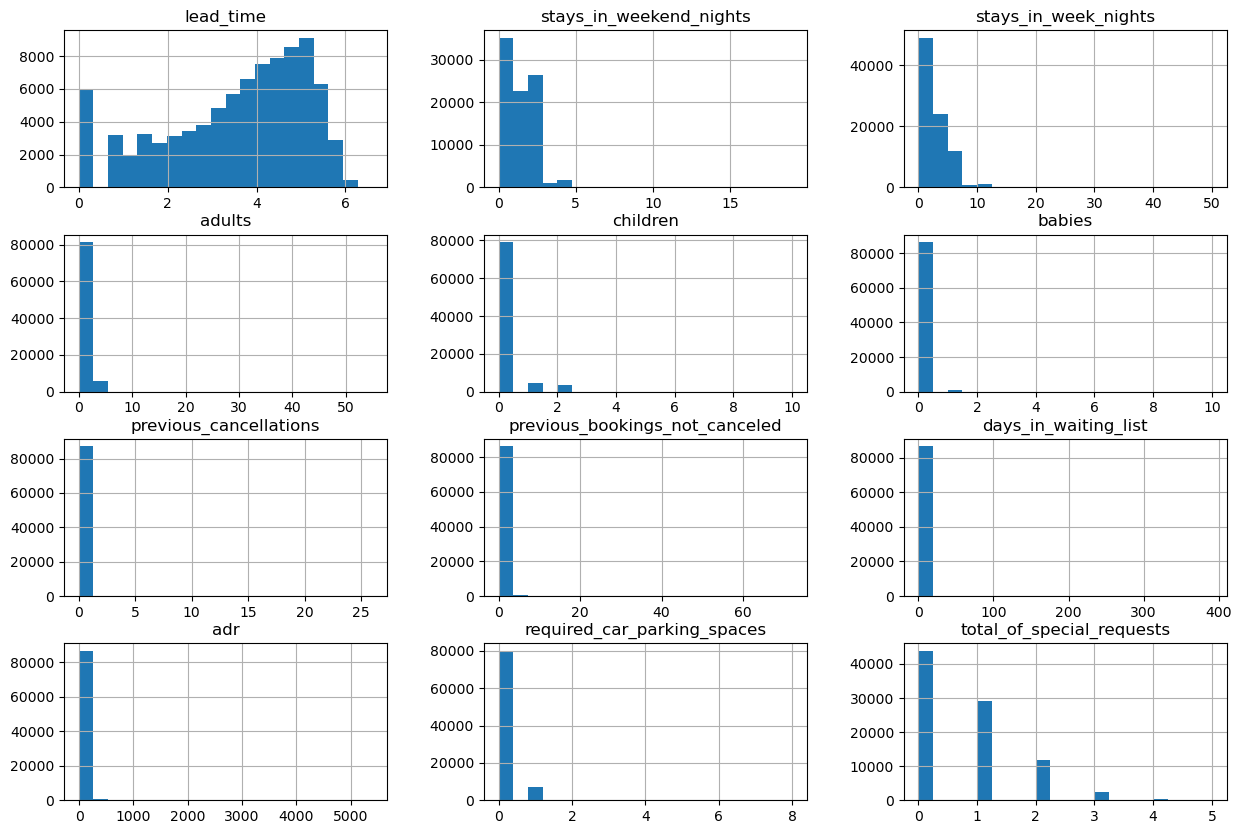

In [47]:
# Histograms for numerical columns
booking_data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()

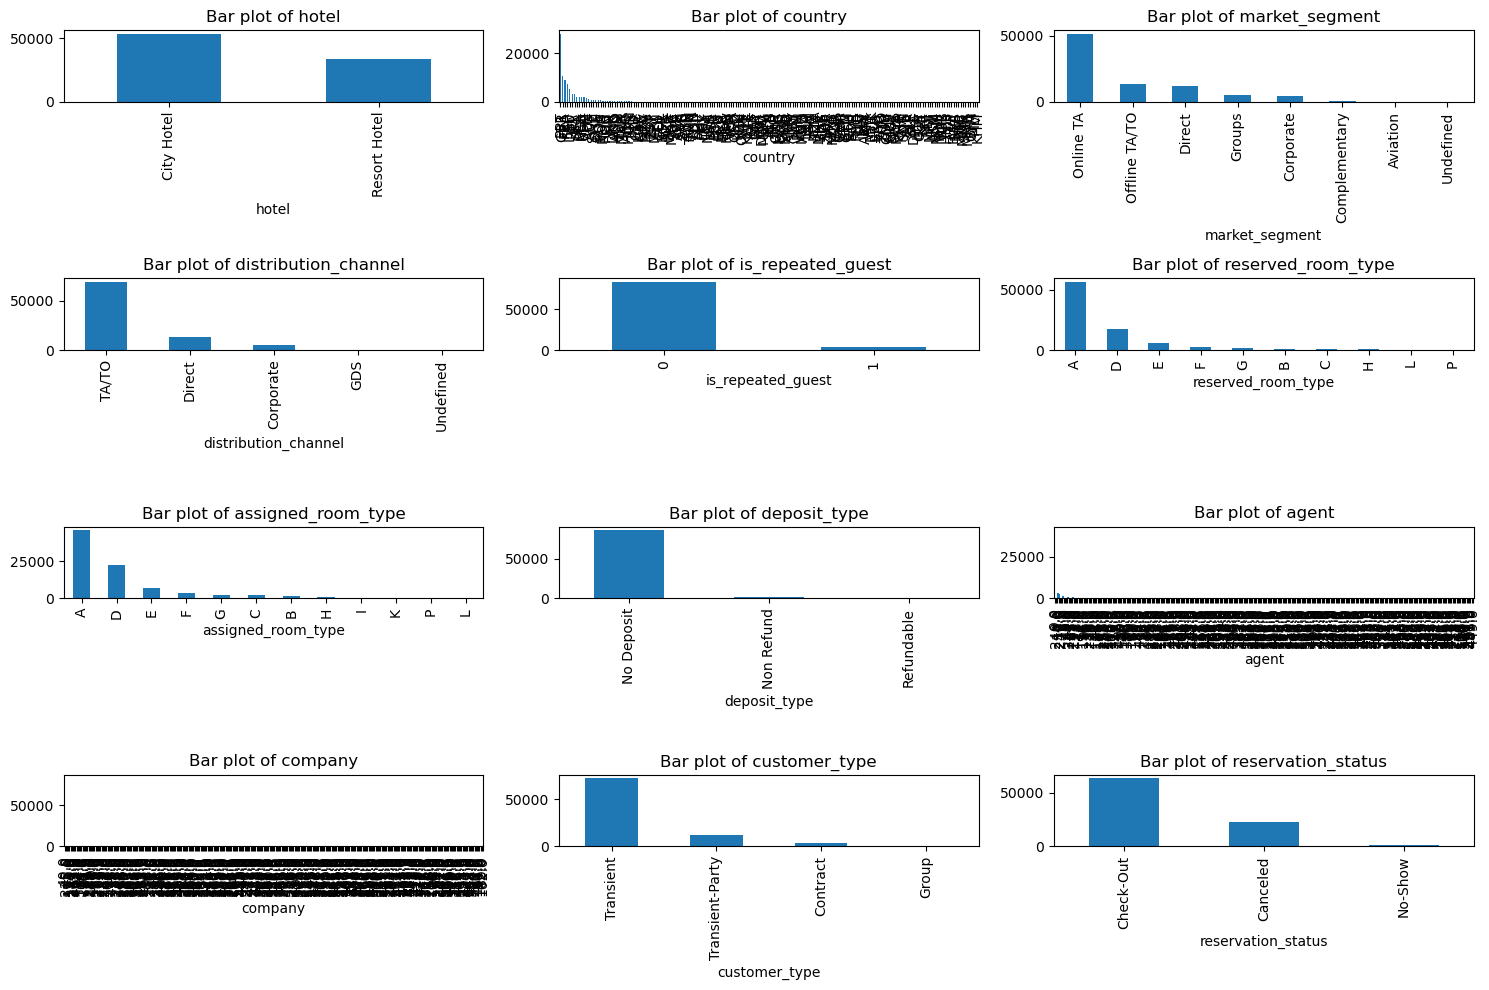

In [61]:
# Bar plot for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    booking_data[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
plt.tight_layout()
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

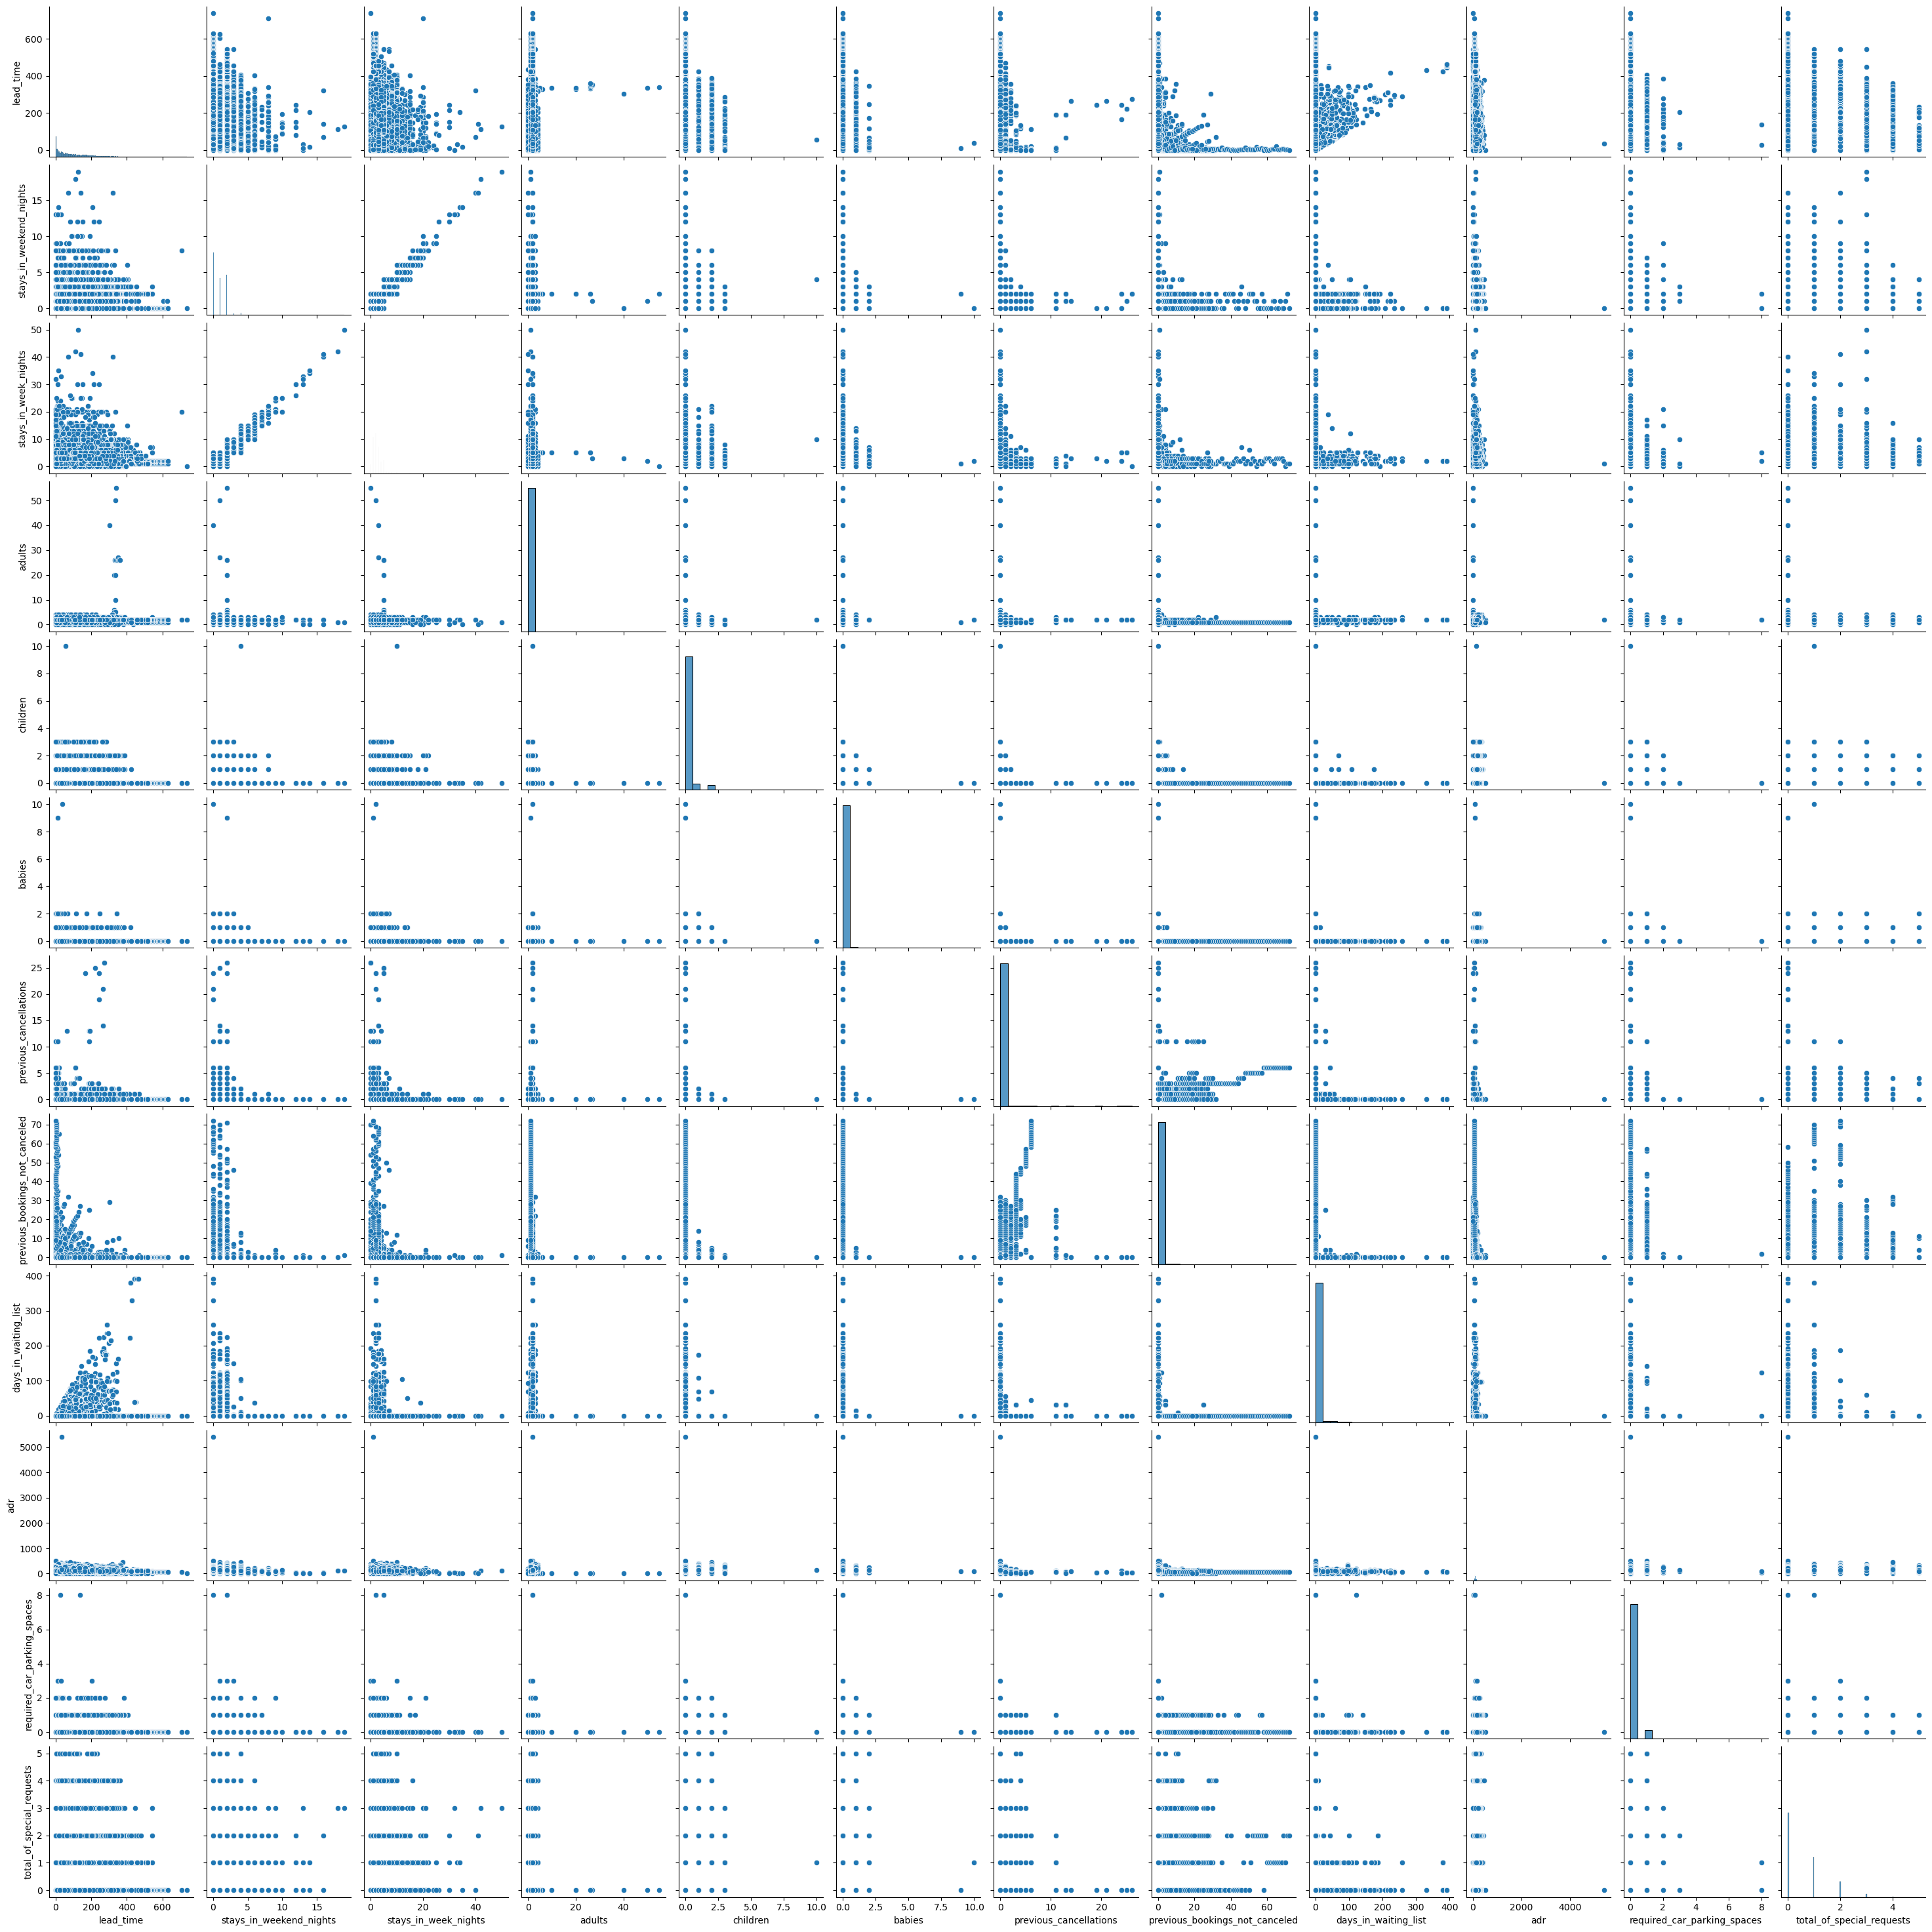

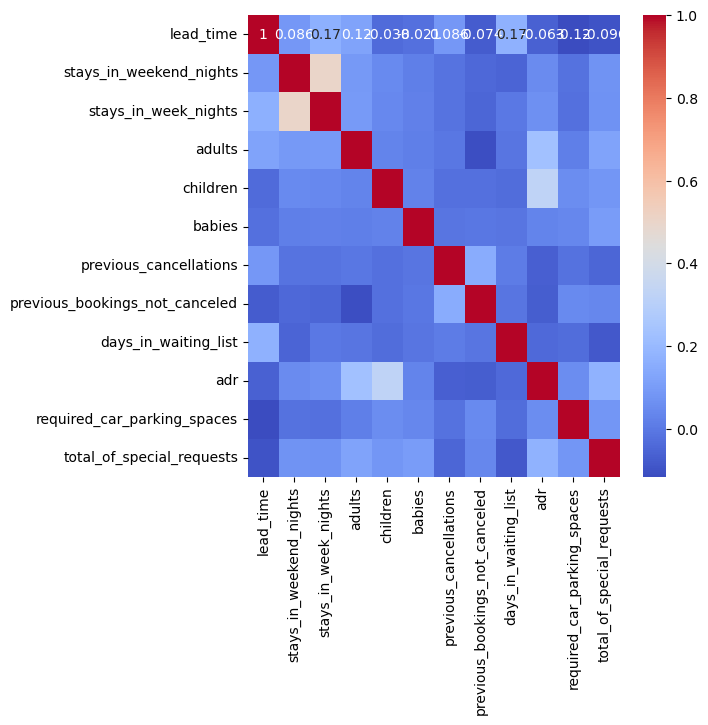

In [12]:
# Scatter plot
sns.pairplot(booking_data[numerical_columns])
plt.show()

# Correlation heatmap
correlation_matrix = booking_data[numerical_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

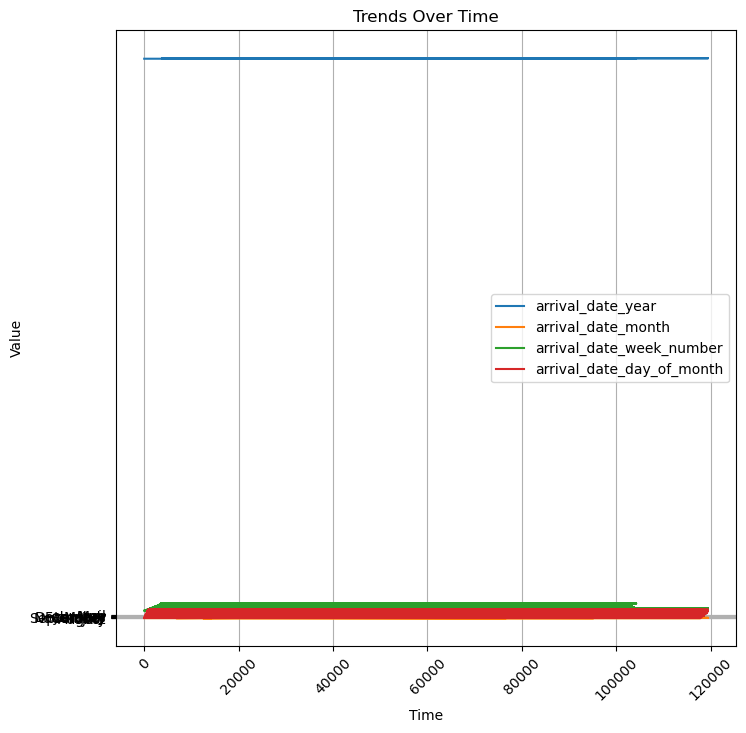

In [65]:
date_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

# Convert month names to numeric values for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
booking_data['arrival_date_month'] = pd.Categorical(booking_data['arrival_date_month'], categories=month_order, ordered=True)

# Sort by arrival date
booking_data_sorted = booking_data.sort_values(by=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

# Plotting
plt.figure(figsize=(8, 8))

for col in date_columns:
    plt.plot(booking_data_sorted[col], label=col)

plt.title('Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [66]:
#4)Correlation Analysis

In [67]:
# Assuming df is your DataFrame containing the data
# and numerical_columns is a list of numerical columns in your DataFrame

numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                     'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list',
                     'adr', 'required_car_parking_spaces', 'total_of_special_requests']

correlation_matrix = booking_data[numerical_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                lead_time  stays_in_weekend_nights  \
lead_time                        1.000000                 0.292888   
stays_in_weekend_nights          0.292888                 1.000000   
stays_in_week_nights             0.361024                 0.555544   
adults                           0.204670                 0.088173   
children                         0.050640                 0.028539   
babies                          -0.000919                 0.013661   
previous_cancellations          -0.021933                -0.020643   
previous_bookings_not_canceled  -0.121976                -0.056664   
days_in_waiting_list             0.082193                -0.031848   
adr                              0.115103                 0.038906   
required_car_parking_spaces     -0.115813                -0.042946   
total_of_special_requests        0.084799                 0.032416   

                                stays_in_week_nights    adults  child

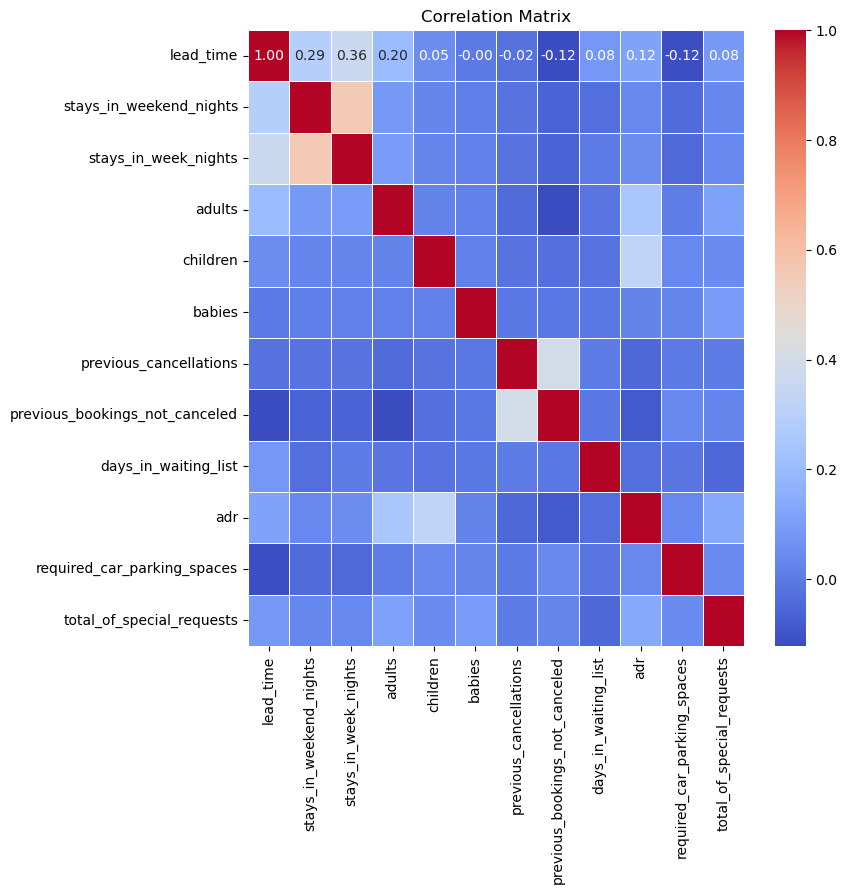

In [69]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [70]:
#5)Categorical Data Analysis

In [14]:
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']
booking_data_encoded = pd.get_dummies(booking_data, columns=categorical_columns, drop_first=True)
booking_data_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,July,27,1,0,0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
1,0,737,2015,July,27,1,0,0,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
2,0,7,2015,July,27,1,0,1,1.0,0.0,...,False,False,False,False,False,False,True,False,True,False
3,0,13,2015,July,27,1,0,1,1.0,0.0,...,False,False,False,False,False,False,True,False,True,False
4,0,14,2015,July,27,1,0,2,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
119386,0,102,2017,August,35,31,2,5,3.0,0.0,...,False,False,False,False,False,False,True,False,True,False
119387,0,34,2017,August,35,31,2,5,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False
119388,0,109,2017,August,35,31,2,5,2.0,0.0,...,False,False,False,False,False,False,True,False,True,False


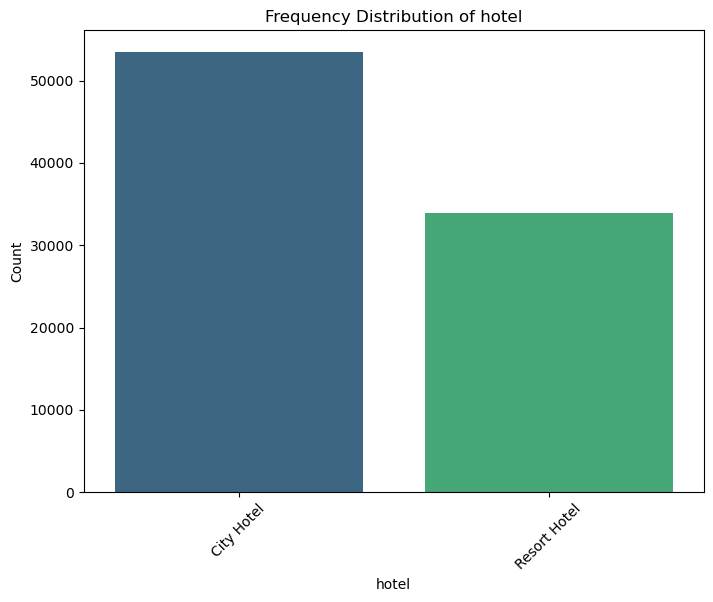

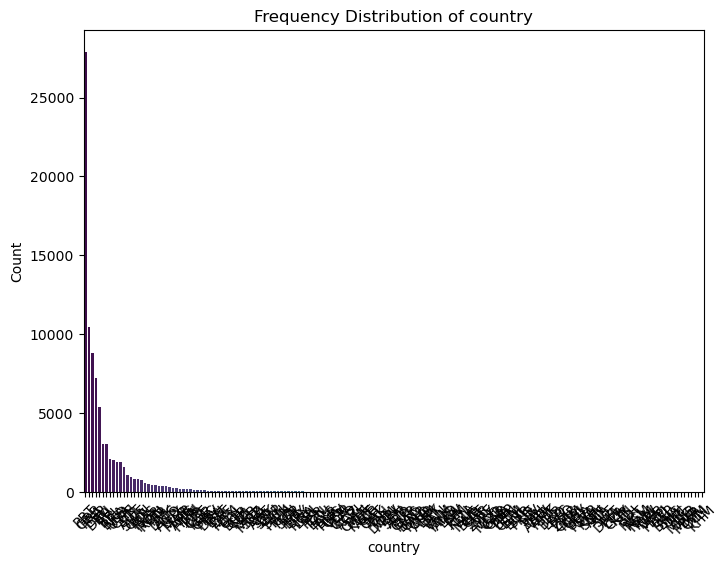

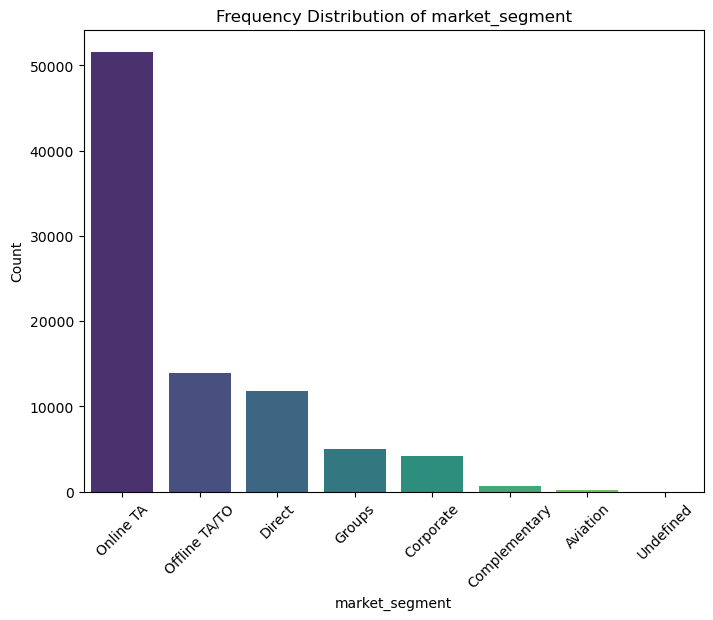

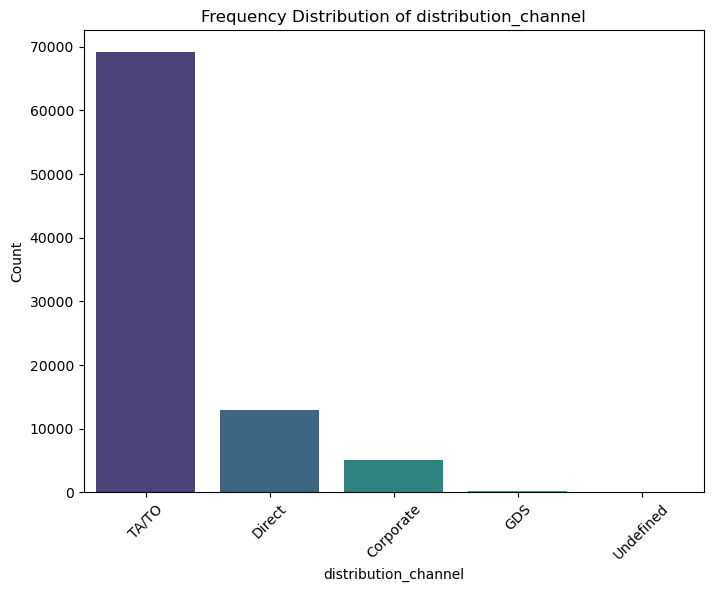

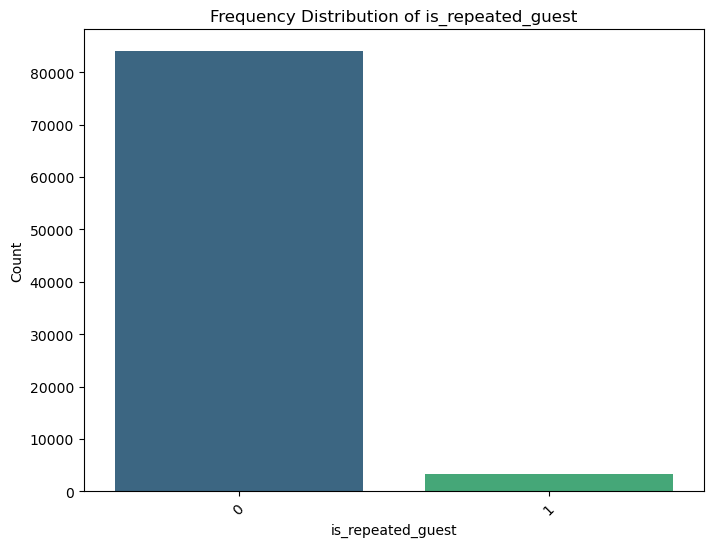

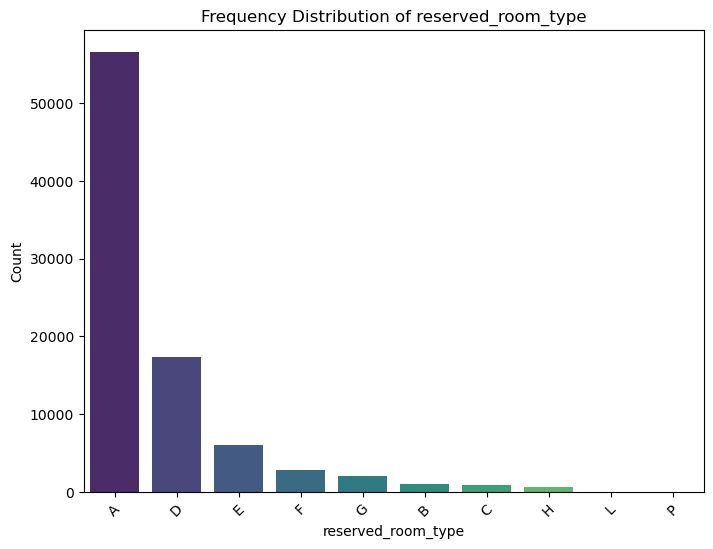

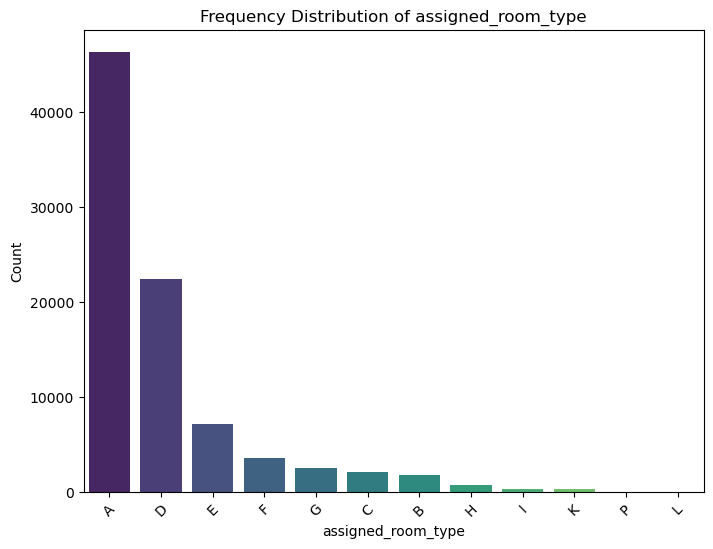

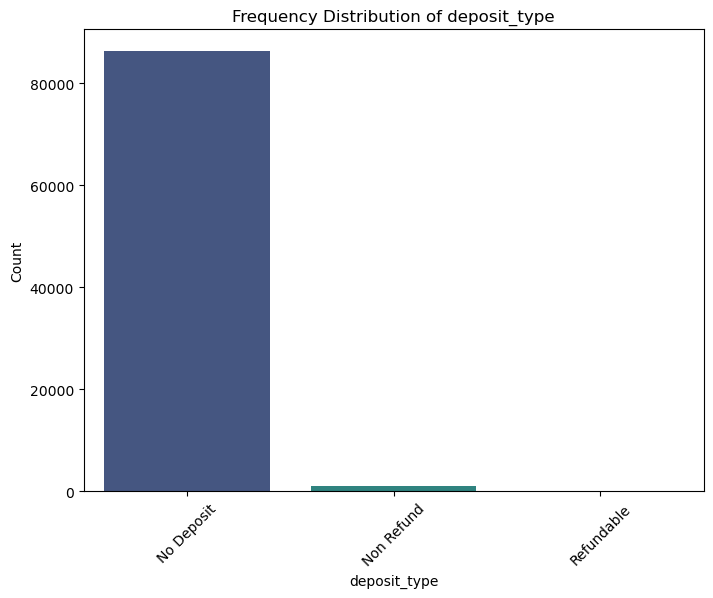

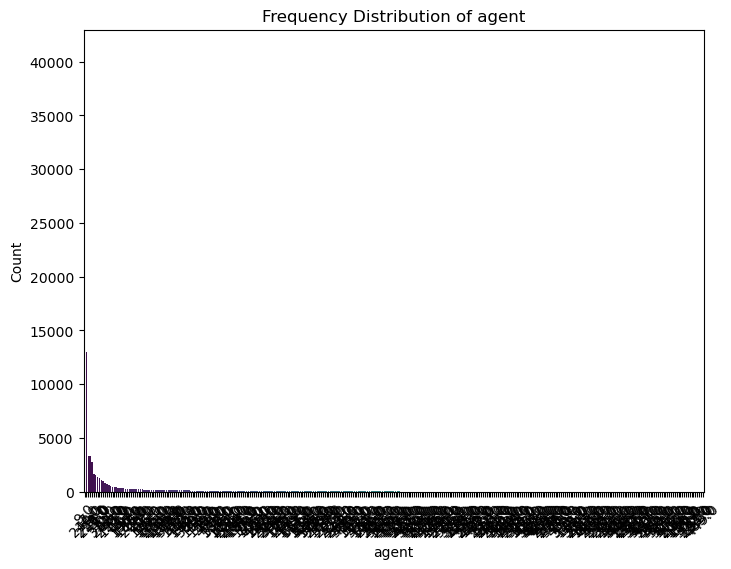

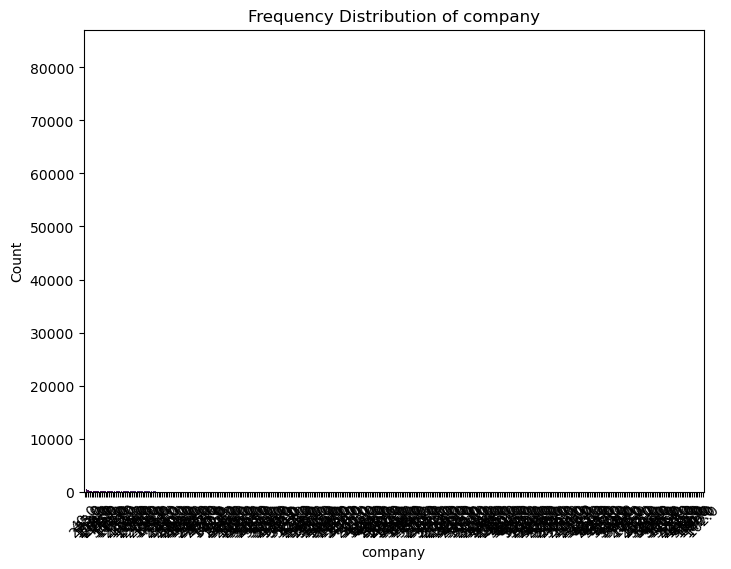

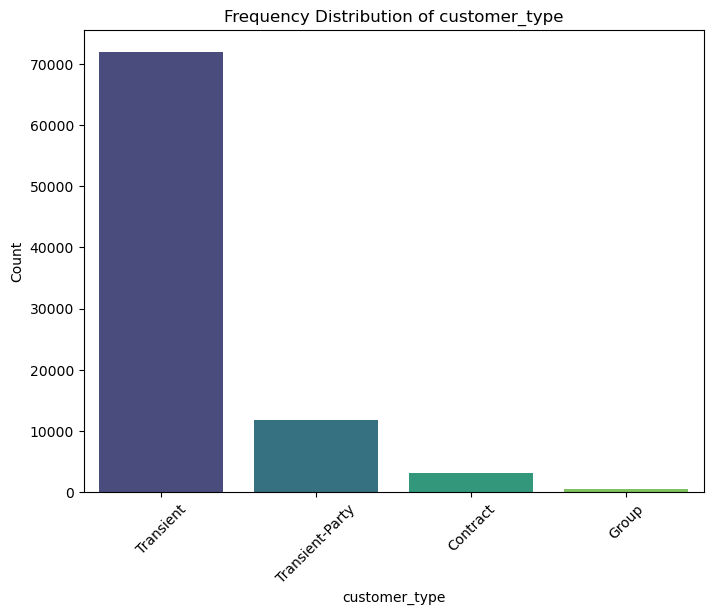

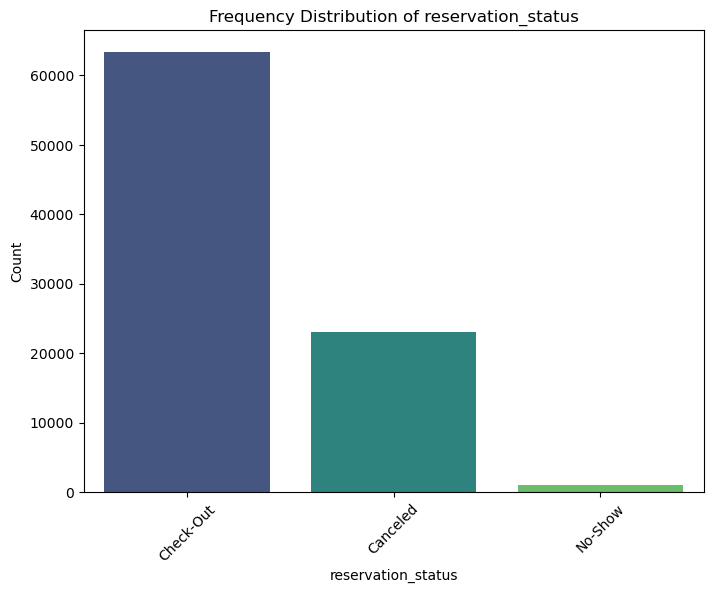

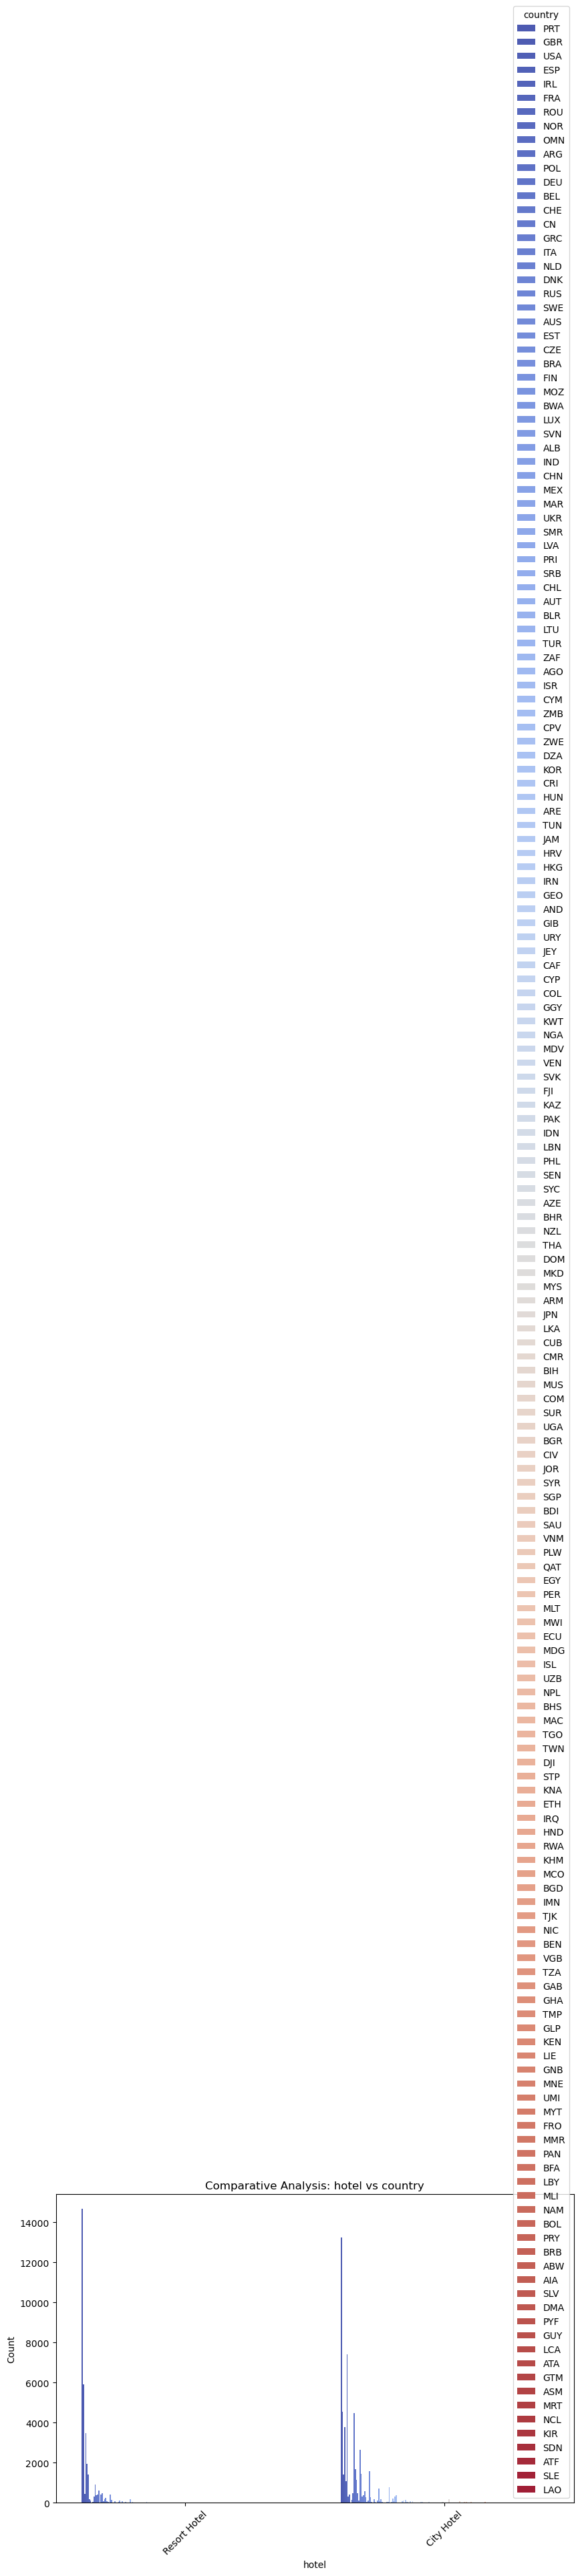

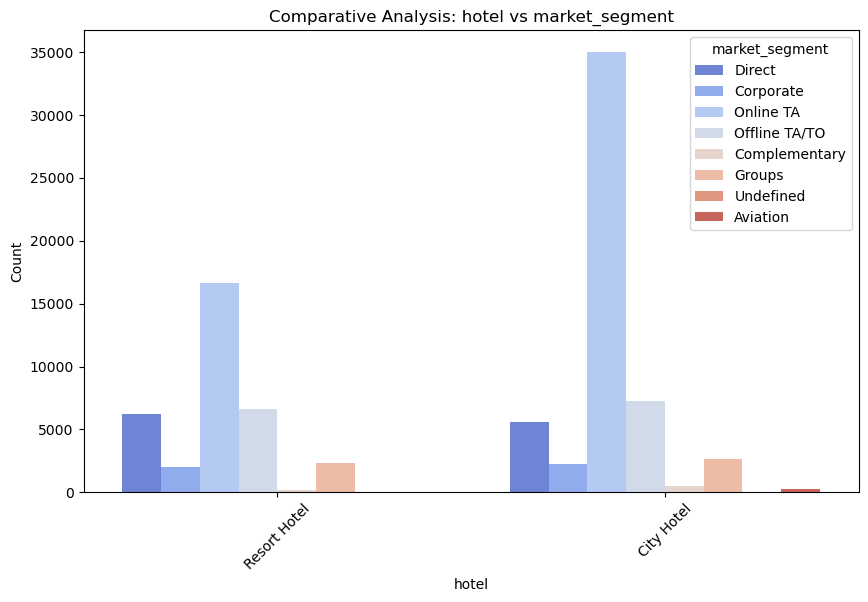

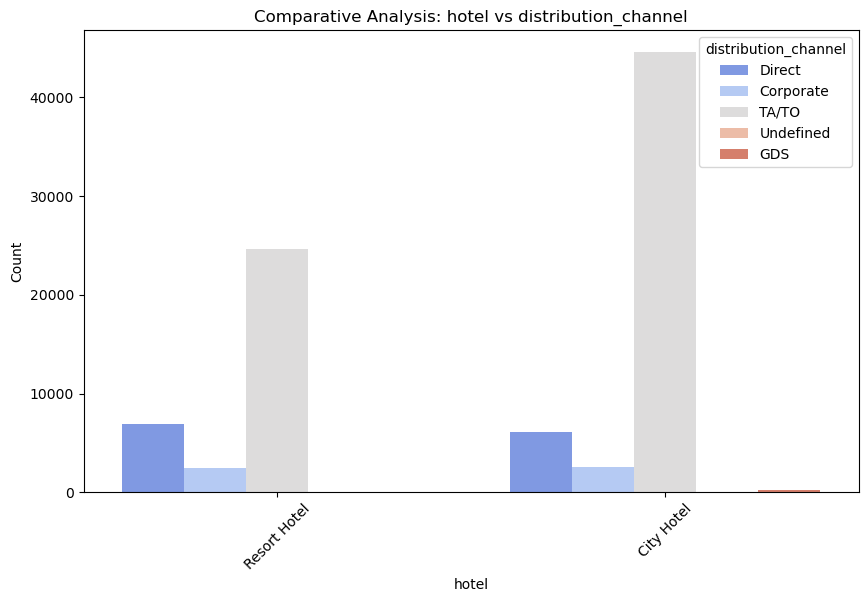

AttributeError: 'numpy.int64' object has no attribute 'startswith'

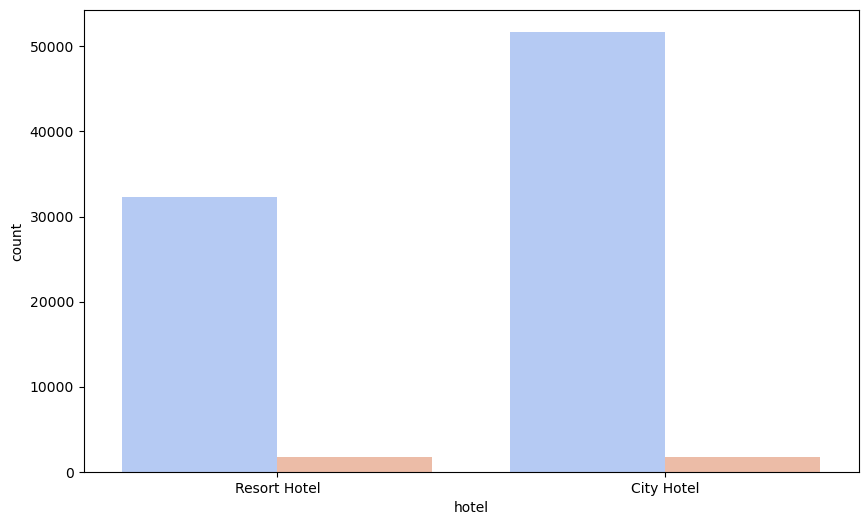

In [73]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=booking_data, x=col, order=booking_data[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Comparative analysis
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=booking_data, x=col1, hue=col2, palette='coolwarm')
            plt.title(f'Comparative Analysis: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title=col2)
            plt.show()

# Cross-tabulation between Pairs of Categorical Columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cross_tab = pd.crosstab(booking_data[col1], booking_data[col2])
            print(f'Cross-tabulation between {col1} and {col2}:')
            print(cross_tab)
            print('\n')

In [75]:
# Create a contingency table for two categorical columns
contingency_table = pd.crosstab(booking_data['hotel'], booking_data['country'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
country       ABW  AGO  AIA  ALB  AND  ARE  ARG  ARM  ASM  ATA  ...  UMI  URY  \
hotel                                                           ...             
City Hotel      2  319    1    8    2   37  147    6    1    2  ...    1   22   
Resort Hotel    0   23    0    3    5   11   56    2    0    0  ...    0    8   

country        USA  UZB  VEN  VGB  VNM  ZAF  ZMB  ZWE  
hotel                                                  
City Hotel    1417    3   18    1    6   60    1    2  
Resort Hotel   458    1    3    0    2   18    1    2  

[2 rows x 177 columns]


<Figure size 1000x600 with 0 Axes>

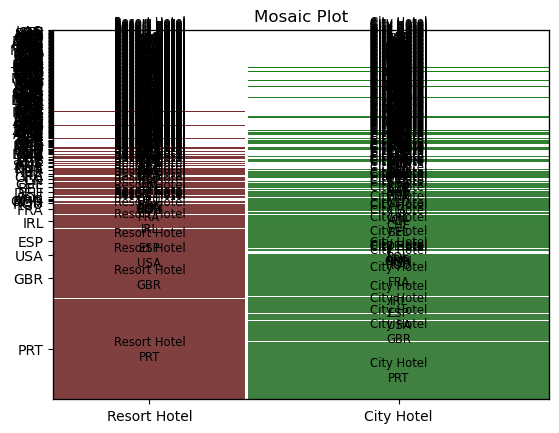

In [77]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot for two categorical columns
plt.figure(figsize=(10, 6))
mosaic(booking_data, ['hotel', 'country'], title='Mosaic Plot')
plt.show()

In [78]:
#6)Time Series Analysis

In [23]:
# Convert reservation_status_date to datetime format with dayfirst=True
booking_data['reservation_status_date'] = pd.to_datetime(booking_data['reservation_status_date'], dayfirst=True)

# Extract additional features from the datetime column
booking_data['reservation_status_day'] = booking_data['reservation_status_date'].dt.day_name()
booking_data['reservation_status_month'] = booking_data['reservation_status_date'].dt.month_name()
booking_data['reservation_status_hour'] = booking_data['reservation_status_date'].dt.hour

# Display the first few rows to verify the changes
booking_data[['reservation_status_date', 'reservation_status_day', 'reservation_status_month', 'reservation_status_hour']].head()

KeyError: 'reservation_status_date'

In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming booking_data is your DataFrame containing the data
# Assuming 'reservation_status_date' is the datetime column

# Set 'reservation_status_date' as the index
booking_data.set_index('reservation_status_date', inplace=True)

# Resample the data to monthly frequency and count the number of bookings
monthly_bookings = booking_data.resample('M').size()

# Plot the time series of monthly bookings
plt.figure(figsize=(12, 6))
monthly_bookings.plot(marker='o', linestyle='-')
plt.title('Monthly Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_bookings, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

KeyError: "None of ['reservation_status_date'] are in the columns"

In [18]:
#Feature Engineering

In [19]:
# Calculate the duration of stay by adding 'stays_in_weekend_nights' and 'stays_in_week_nights'
booking_data['stay_duration'] = booking_data['stays_in_weekend_nights'] + booking_data['stays_in_week_nights']

# Display the first few rows to verify the changes
print(booking_data[['stays_in_weekend_nights', 'stays_in_week_nights', 'stay_duration']].head())

                         stays_in_weekend_nights  stays_in_week_nights  \
reservation_status_date                                                  
2015-07-01                                     0                     0   
2015-07-01                                     0                     0   
2015-07-02                                     0                     1   
2015-07-02                                     0                     1   
2015-07-03                                     0                     2   

                         stay_duration  
reservation_status_date                 
2015-07-01                           0  
2015-07-01                           0  
2015-07-02                           1  
2015-07-02                           1  
2015-07-03                           2  


In [24]:
# Convert arrival date columns to a single datetime column
booking_data['arrival_date'] = pd.to_datetime(booking_data['arrival_date_year'].astype(str) + '-' +
                                                        booking_data['arrival_date_month'].astype(str) + '-01')
# Calculate duration of stay
booking_data['total_stay'] = booking_data['stays_in_weekend_nights'] + booking_data['stays_in_week_nights']
booking_data['total_stay']
# Derive new features from date columns
booking_data['arrival_month'] = booking_data['arrival_date'].dt.month_name()
booking_data['arrival_day'] = booking_data['arrival_date'].dt.day_name()
booking_data['season'] = booking_data['arrival_date'].dt.month % 12 // 3 + 1
booking_data['season'] = booking_data['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_day,reservation_status_month,reservation_status_hour,stay_duration,arrival_date,total_stay,arrival_month,arrival_day,season
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,Check-Out,Wednesday,July,0,0,2015-07-01,0,July,Wednesday,Summer
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,Check-Out,Wednesday,July,0,0,2015-07-01,0,July,Wednesday,Summer
2015-07-02,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,Check-Out,Thursday,July,0,1,2015-07-01,1,July,Wednesday,Summer
2015-07-02,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,Check-Out,Thursday,July,0,1,2015-07-01,1,July,Wednesday,Summer
2015-07-03,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,Check-Out,Friday,July,0,2,2015-07-01,2,July,Wednesday,Summer


In [5]:
# Convert reservation_status_date to datetime format with dayfirst=True
booking_data['reservation_status_date'] = pd.to_datetime(booking_data['reservation_status_date'], dayfirst=True)

# Extract additional features from the datetime column
booking_data['reservation_status_day'] = booking_data['reservation_status_date'].dt.day_name()
booking_data['reservation_status_month'] = booking_data['reservation_status_date'].dt.month_name()
booking_data['reservation_status_hour'] = booking_data['reservation_status_date'].dt.hour

# Display the first few rows to verify the changes
booking_data[['reservation_status_date', 'reservation_status_day', 'reservation_status_month', 'reservation_status_hour']].head(10)

,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_hour
0,2015-07-01,Wednesday,July,0
1,2015-07-01,Wednesday,July,0
2,2015-07-02,Thursday,July,0
3,2015-07-02,Thursday,July,0
4,2015-07-03,Friday,July,0
5,2015-07-03,Friday,July,0
6,2015-07-03,Friday,July,0
7,2015-07-03,Friday,July,0
8,2015-05-06,Wednesday,May,0
9,2015-04-22,Wednesday,April,0
